# Importing and addressing the Problem

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np        

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/jason/Desktop/CCT/Machine Learning/CA1/archive (5)/diabetes_012_health_indicators_BRFSS2015.csv')
pd.set_option('display.max_columns', None)

In [4]:
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[253680 rows x 22 columns]

In [5]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

# Preprocessing

Checklist 
Null values
Duplicates
Categorial data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.duplicated().sum()

23899

In [8]:
df.drop_duplicates()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[229781 rows x 22 columns]

In [9]:
df = df.drop_duplicates()

In [10]:
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[229781 rows x 22 columns]

In [11]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [12]:
diabetes_02_index = df[df['Diabetes_012']==2].index
df.loc[diabetes_02_index, ['Diabetes_012']] = 1
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
1.0     39726
Name: count, dtype: int64

In [13]:
correlation_matrix = df.corr()
print(correlation_matrix['Diabetes_012'])

Diabetes_012            1.000000
HighBP                  0.260346
HighChol                0.204418
CholCheck               0.076190
BMI                     0.211155
Smoker                  0.046262
Stroke                  0.097685
HeartDiseaseorAttack    0.167184
PhysActivity           -0.102391
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
AnyHealthcare           0.023756
NoDocbcCost             0.025940
GenHlth                 0.282328
MentHlth                0.058826
PhysHlth                0.158697
DiffWalk                0.208126
Sex                     0.030797
Age                     0.185479
Education              -0.108504
Income                 -0.147809
Name: Diabetes_012, dtype: float64


In [14]:
correlations = df.corr()['Diabetes_012']

strong_correlations = correlations[(correlations <= -0.1) | (correlations >= 0.1)]

print(strong_correlations)

Diabetes_012            1.000000
HighBP                  0.260346
HighChol                0.204418
BMI                     0.211155
HeartDiseaseorAttack    0.167184
PhysActivity           -0.102391
GenHlth                 0.282328
PhysHlth                0.158697
DiffWalk                0.208126
Age                     0.185479
Education              -0.108504
Income                 -0.147809
Name: Diabetes_012, dtype: float64


In [15]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model #1 Logistic Regression

## 20%

In [58]:
columns = ["HighBP", "HighChol", "BMI", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "GenHlth", "PhysHlth", "DiffWalk", "Age", "Education", "Income"]

clean_df = df[columns]

In [59]:
X = clean_df
y = df['Diabetes_012']

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8296668625019039
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     37836
         1.0       0.56      0.17      0.26      8121

    accuracy                           0.83     45957
   macro avg       0.70      0.57      0.58     45957
weighted avg       0.79      0.83      0.79     45957

Confusion Matrix:
 [[36727  1109]
 [ 6719  1402]]


In [64]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')  
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
feature_names= X.columns  

coefficients = model.coef_[0] 
importances = np.abs(coefficients)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature GenHlth (0.5250540400484097)
2. feature BMI (0.41101819543819024)
3. feature Age (0.3955552897843703)
4. feature HighBP (0.34889298096969146)
5. feature HighChol (0.29651142265624775)
6. feature Income (0.08037733948282494)
7. feature HeartDiseaseorAttack (0.07172036259671541)
8. feature PhysHlth (0.06863359036396952)
9. feature Education (0.03509046287714649)
10. feature DiffWalk (0.03502493872452027)
11. feature Stroke (0.023275780183607556)
12. feature PhysActivity (0.007144878259860581)


## 25%

In [68]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8295268600076594
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     47275
         1.0       0.56      0.17      0.26     10171

    accuracy                           0.83     57446
   macro avg       0.70      0.57      0.58     57446
weighted avg       0.79      0.83      0.79     57446

Confusion Matrix:
 [[45904  1371]
 [ 8422  1749]]


In [69]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy') 
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.829302966562704
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90     56750
         1.0       0.56      0.17      0.26     12185

    accuracy                           0.83     68935
   macro avg       0.70      0.57      0.58     68935
weighted avg       0.79      0.83      0.79     68935

Confusion Matrix:
 [[55089  1661]
 [10106  2079]]


## 30%

In [73]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


# Model #2 Random Forest

## 20%

In [74]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [77]:
y_pred = dt_classifier.predict(X_test)
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
45952     0.0        0.0
45953     0.0        0.0
45954     0.0        0.0
45955     1.0        0.0
45956     0.0        0.0

[45957 rows x 2 columns]


In [78]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.83

Confusion Matrix:
[[36670  1166]
 [ 6636  1485]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     37836
         1.0       0.56      0.18      0.28      8121

    accuracy                           0.83     45957
   macro avg       0.70      0.58      0.59     45957
weighted avg       0.80      0.83      0.79     45957



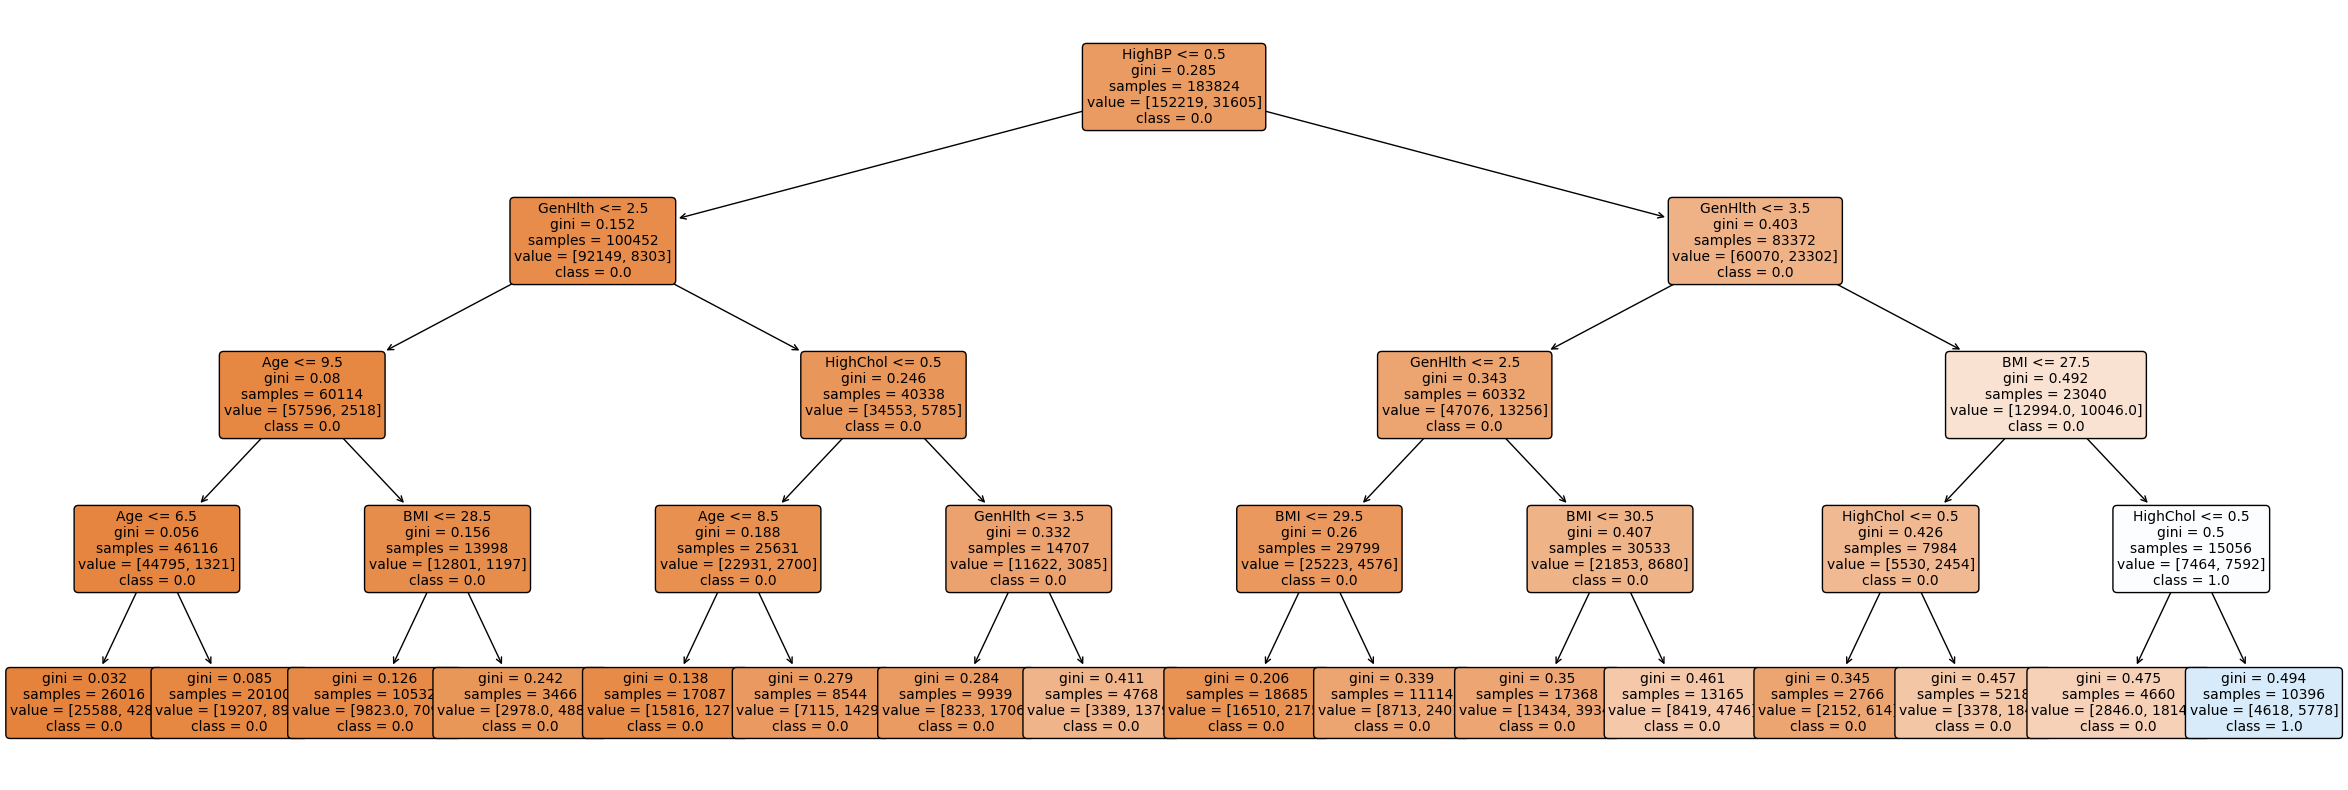

In [79]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [80]:
importances=  dt_classifier.feature_importances_
indices =np.argsort(importances)[::-1]
feature_names = X.columns    
indices =np.argsort(importances)[::-1]  
print ("Feature ranking:")
for f in range(len(feature_names)):  
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature HighBP (0.46076628537283437)
2. feature GenHlth (0.34746951780593227)
3. feature BMI (0.10961848017250582)
4. feature HighChol (0.05794177855025896)
5. feature Age (0.02420393809846865)
6. feature Fruits (0.0)
7. feature CholCheck (0.0)
8. feature Smoker (0.0)
9. feature Stroke (0.0)
10. feature HeartDiseaseorAttack (0.0)
11. feature PhysActivity (0.0)
12. feature Income (0.0)
13. feature Veggies (0.0)
14. feature Education (0.0)
15. feature AnyHealthcare (0.0)
16. feature NoDocbcCost (0.0)
17. feature MentHlth (0.0)
18. feature PhysHlth (0.0)
19. feature DiffWalk (0.0)
20. feature Sex (0.0)
21. feature HvyAlcoholConsump (0.0)


In [81]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.83358357 0.82652972 0.83199147 0.82837932 0.83062059]
Mean cross-validation score: 0.8302209348787221


## 25%

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [83]:
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [84]:
y_pred = dt_classifier.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
57441     0.0        0.0
57442     0.0        0.0
57443     0.0        0.0
57444     1.0        1.0
57445     1.0        0.0

[57446 rows x 2 columns]


In [85]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.83

Confusion Matrix:
[[45812  1463]
 [ 8338  1833]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     47275
         1.0       0.56      0.18      0.27     10171

    accuracy                           0.83     57446
   macro avg       0.70      0.57      0.59     57446
weighted avg       0.79      0.83      0.79     57446



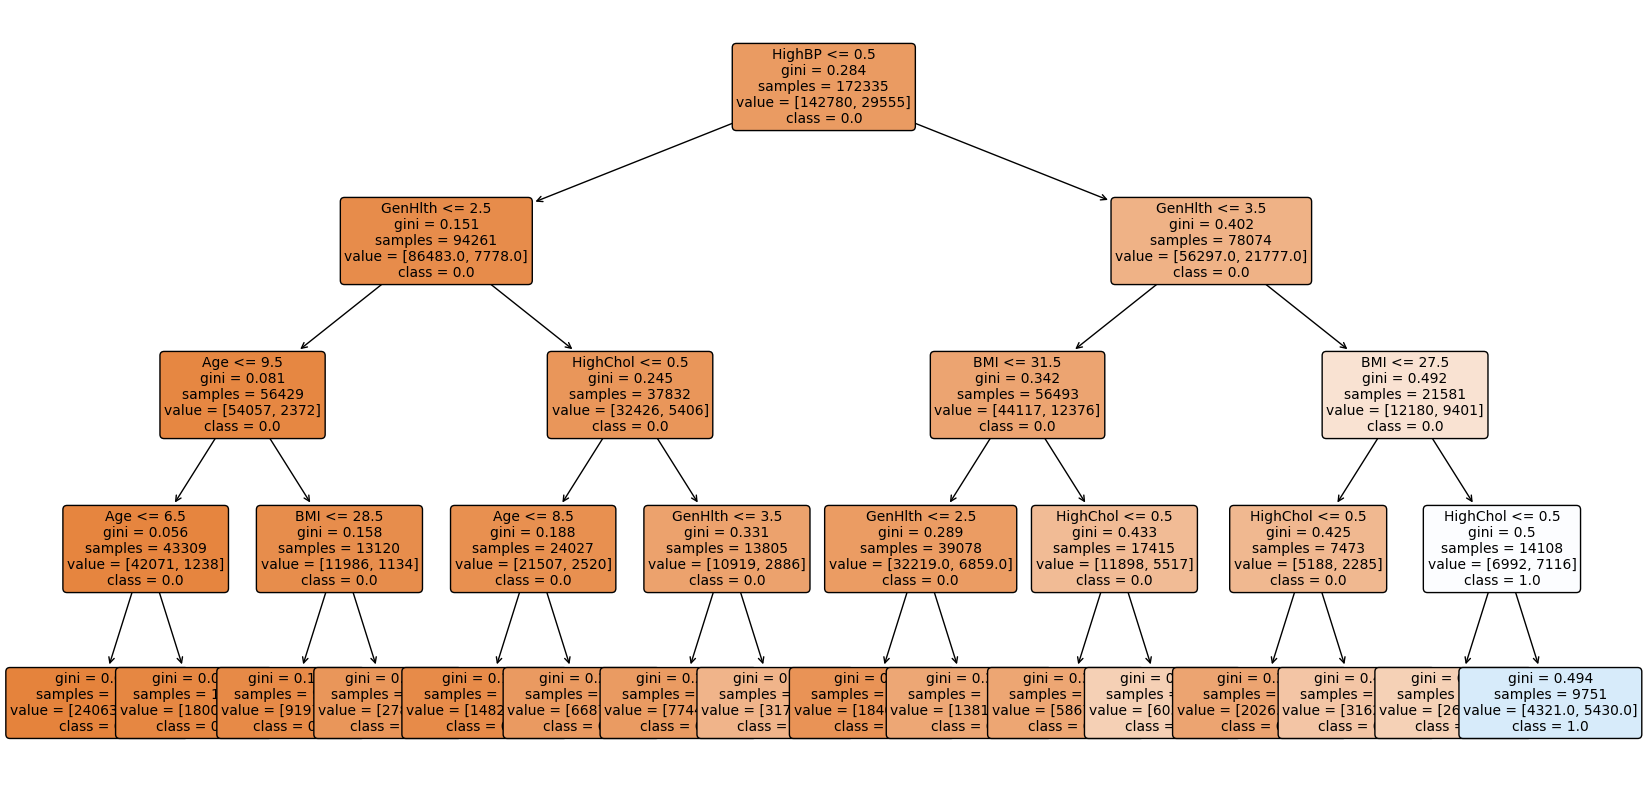

In [86]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [87]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.83358357 0.82652972 0.83199147 0.82837932 0.83062059]
Mean cross-validation score: 0.8302209348787221


## 30%

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [89]:
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [90]:
y_pred = dt_classifier.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
68930     0.0        0.0
68931     0.0        0.0
68932     0.0        0.0
68933     0.0        0.0
68934     0.0        0.0

[68935 rows x 2 columns]


In [91]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.83

Confusion Matrix:
[[55003  1747]
 [ 9998  2187]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90     56750
         1.0       0.56      0.18      0.27     12185

    accuracy                           0.83     68935
   macro avg       0.70      0.57      0.59     68935
weighted avg       0.79      0.83      0.79     68935



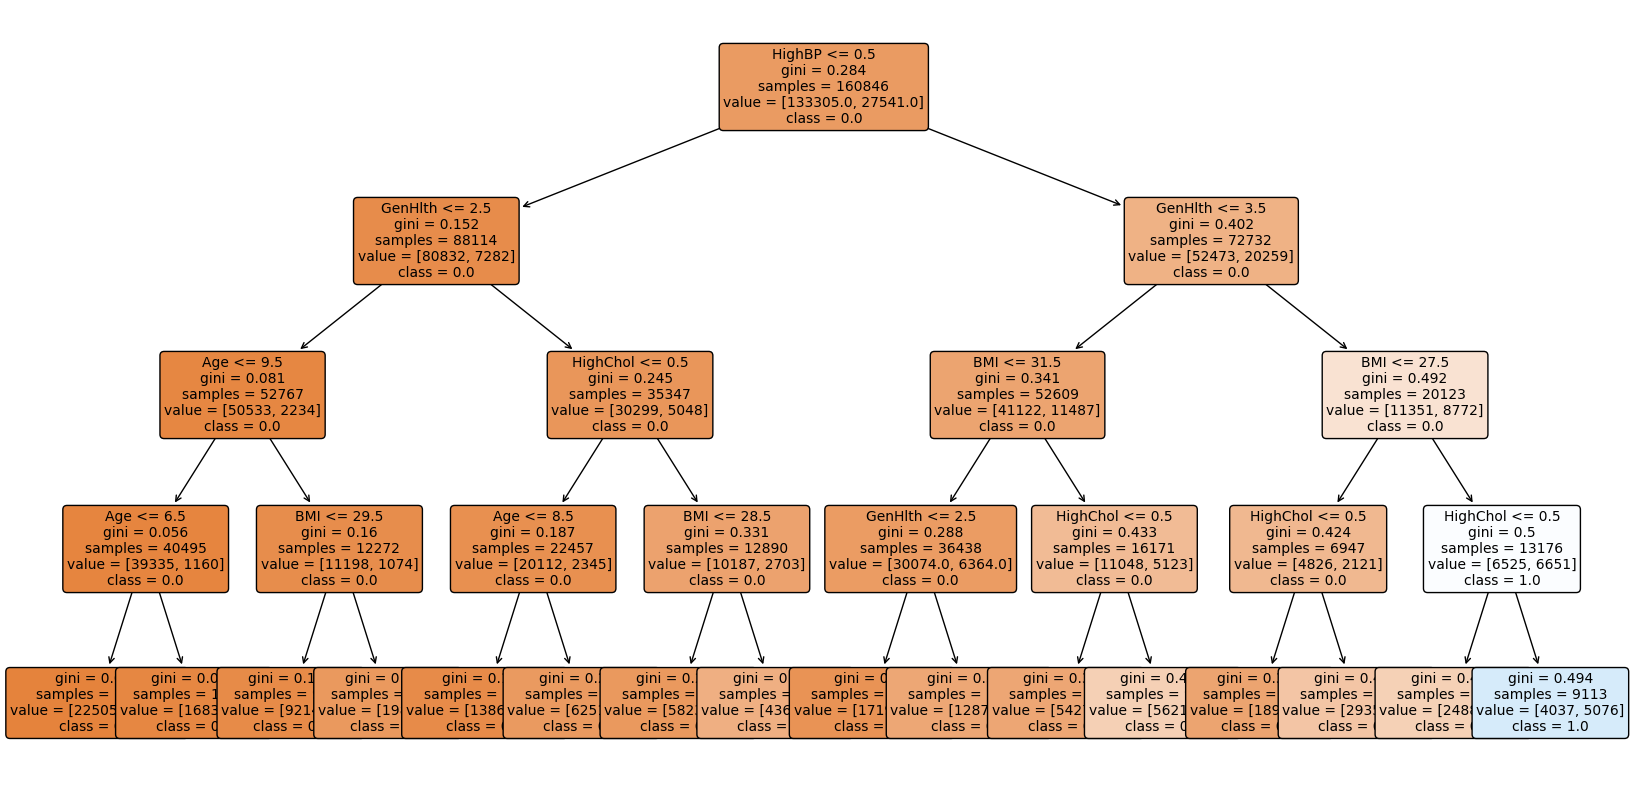

In [92]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

# Model #3 GNB

## 20%

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [94]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [95]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [96]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [97]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.7493308962726026


In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)

[[29808  8028]
 [ 3492  4629]] (2, 2)


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     37836
         1.0       0.37      0.57      0.45      8121

    accuracy                           0.75     45957
   macro avg       0.63      0.68      0.64     45957
weighted avg       0.80      0.75      0.77     45957



## 25%

In [100]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 60).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 55).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 35).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 30).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 25).mean())

0.7485684566569861
0.7485084199505865
0.7486120589318809
0.7484990579668813
0.7485514661228972
0.7485296449900183
0.7486038518936692
0.7485297717646553


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [102]:
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [103]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1. 0. 0. ... 0. 1. 1.]


In [104]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [1., 1.]])

In [105]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.7491905441632142


In [106]:
cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)
print(classification_report(y_test, y_pred))

[[37261 10014]
 [ 4394  5777]] (2, 2)
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     47275
         1.0       0.37      0.57      0.45     10171

    accuracy                           0.75     57446
   macro avg       0.63      0.68      0.64     57446
weighted avg       0.80      0.75      0.77     57446



In [107]:
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 60).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 55).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 35).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 30).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 25).mean())

0.7485684566569861
0.7485084199505865
0.7486120589318809
0.7484990579668813
0.7485514661228972
0.7485296449900183
0.7486038518936692
0.7485297717646553


## 30%

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [109]:
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [110]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1. 0. 0. ... 0. 1. 0.]


In [111]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [112]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7482120838471024


In [113]:
cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)
print(classification_report(y_test, y_pred))

[[44717 12033]
 [ 5324  6861]] (2, 2)
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     56750
         1.0       0.36      0.56      0.44     12185

    accuracy                           0.75     68935
   macro avg       0.63      0.68      0.64     68935
weighted avg       0.80      0.75      0.77     68935



In [114]:
nvclassifier = GaussianNB()

print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())


0.7486120589318809
0.7484990579668813
0.7485514661228972


In [115]:
from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 190055, 1.0: 39726})
Resampled dataset shape Counter({0.0: 190055, 1.0: 190055})


# Model #4 SVM

## 20%

In [116]:
from sklearn.svm import SVC
X = clean_df
y = df['Diabetes_012']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

# Results

Features

## Model 1. LogisticRegression

In [ ]:
M1a = 83
M1b = 83
M1c = 83
M2a = 83
M2b = 83
M2c = 83
M3a = 74
M3b = 74
M3c = 74
M4a = 83
M4b = 83
M4c = 83